In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/samplebankloandata - Sheet1.csv")

In [2]:
print(data.head())
print(data.tail())

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  1/12/2011  1012015            10.0           RENT   
1  1077430  2011  1/12/2011  1042013             0.5           RENT   
2  1077175  2011  1/12/2011  1062014            10.0           RENT   
3  1076863  2011  1/12/2011  1012015            10.0           RENT   
4  1075358  2011  1/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

In [ ]:
print(data.dtypes)

id                        int64
year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object


In [ ]:
print(data.isnull().sum())

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64


In [4]:
data['total_rec_prncp'] = data['total_rec_prncp'].fillna(data['total_rec_prncp'].mean())
data['recoveries'] = data['recoveries'].fillna(data['recoveries'].mean())
data['installment'] = data['installment'].fillna(data['installment'].mean())

In [5]:
print(data.isnull().sum())

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  1
dtype: int64


In [ ]:
print(data.isnull().sum())

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64


In [ ]:
print(data.describe())

                 id          year       final_d  emp_length_int  \
count  9.590200e+04  95902.000000  9.590200e+04    95902.000000   
mean   1.147685e+06   2011.215606  1.066972e+06        5.460427   
std    5.318572e+05      1.089114  3.598648e+04        3.454501   
min    5.473400e+04   2007.000000  1.012008e+06        0.500000   
25%    6.907415e+05   2011.000000  1.032015e+06        2.000000   
50%    1.150927e+06   2012.000000  1.072012e+06        5.000000   
75%    1.486514e+06   2012.000000  1.102012e+06       10.000000   
max    2.844673e+06   2012.000000  1.122015e+06       10.000000   

       home_ownership_cat    annual_inc    income_cat   loan_amount  \
count        95902.000000  9.590200e+04  95902.000000  95902.000000   
mean             2.001147  6.946160e+04      1.157838  12409.672113   
std              0.965478  6.112689e+04      0.402594   7882.887605   
min              1.000000  1.896000e+03      1.000000    500.000000   
25%              1.000000  4.200000e+04  

Histogram

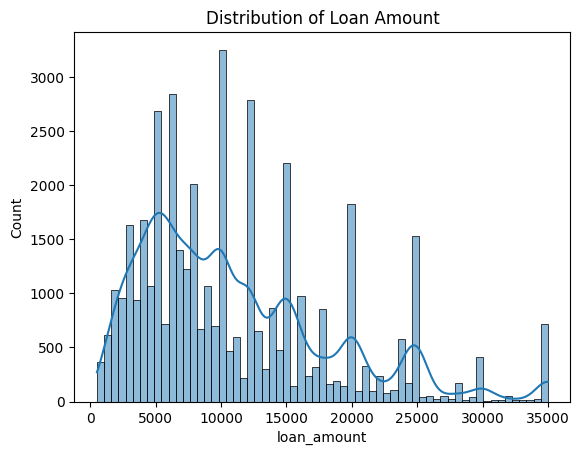

In [6]:
sns.histplot(data=data,x='loan_amount',kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

CountPlot

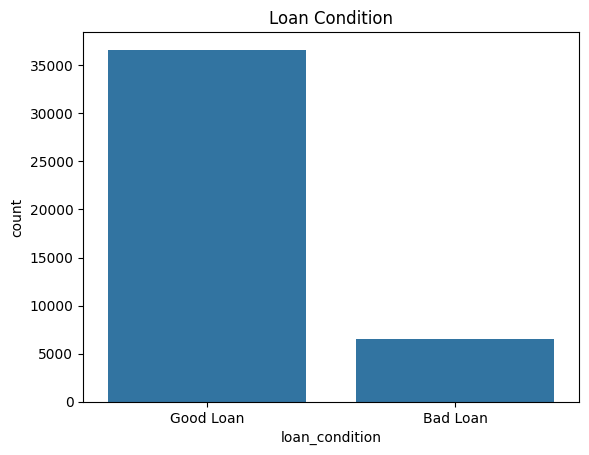

In [52]:
sns.countplot(data=data,x='loan_condition')
plt.title("Loan Condition")
plt.show()

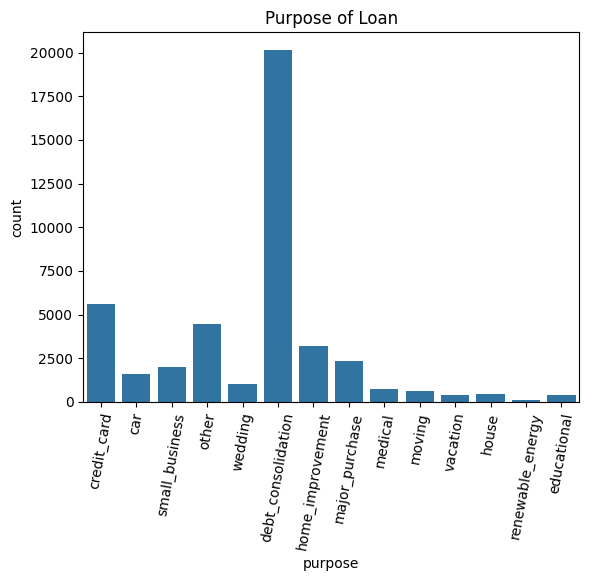

In [8]:
sns.countplot(data=data,x='purpose')
plt.xticks(rotation=80)#To specify the angle of x labels
plt.title("Purpose of Loan")
plt.show()

Bar Chart

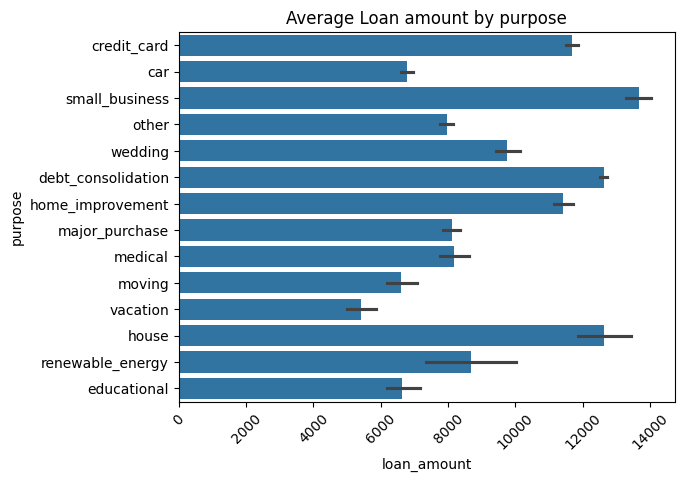

In [9]:
sns.barplot(data=data,x='loan_amount',y='purpose',estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Loan amount by purpose")
plt.show()

Pie chart

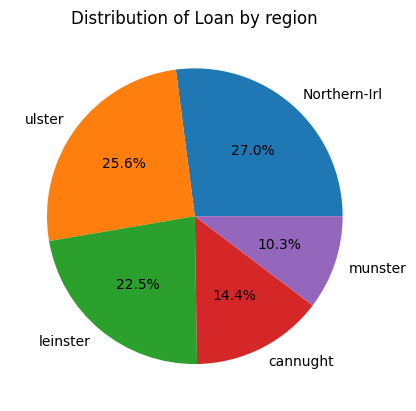

In [10]:
plt.pie(data['region'].value_counts(),labels=data['region'].value_counts().index,autopct='%1.1f%%')
plt.title("Distribution of Loan by region")
plt.show()

Heat Map

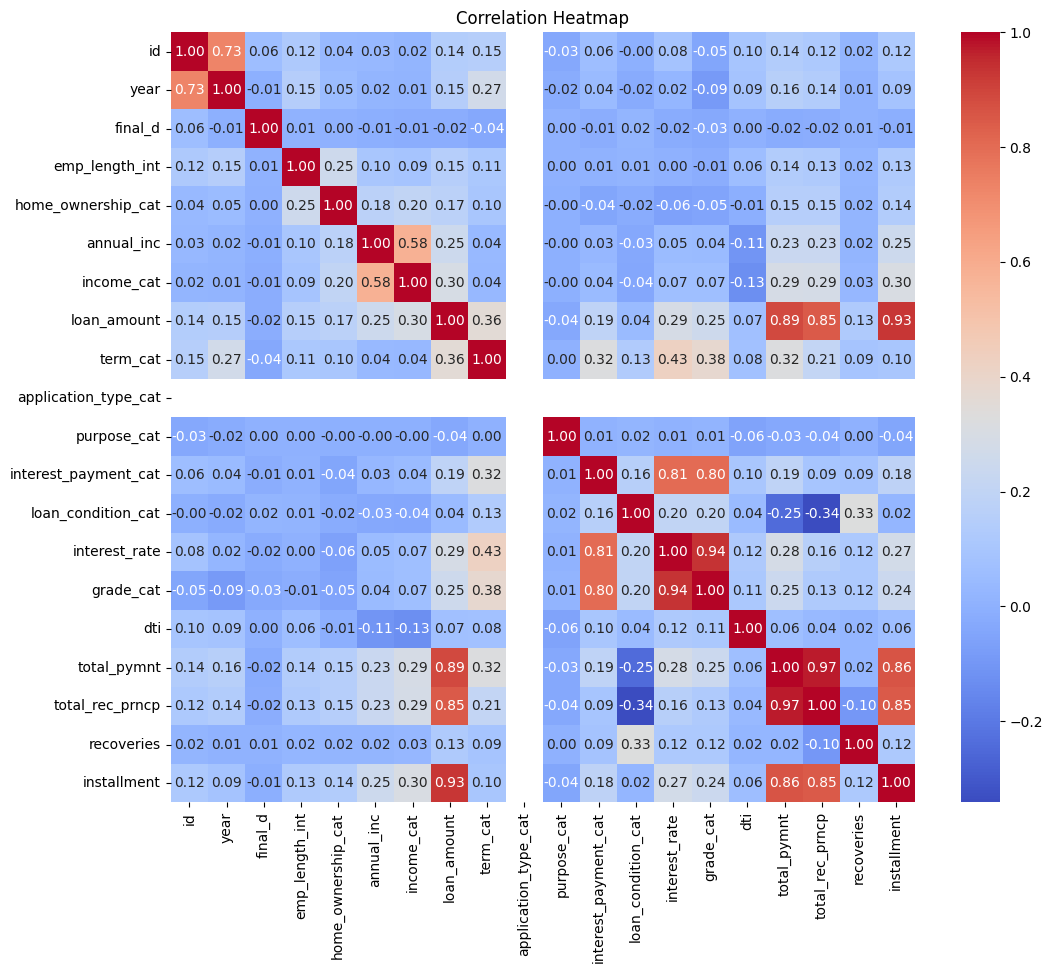

In [11]:
corr = data.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Box Plot

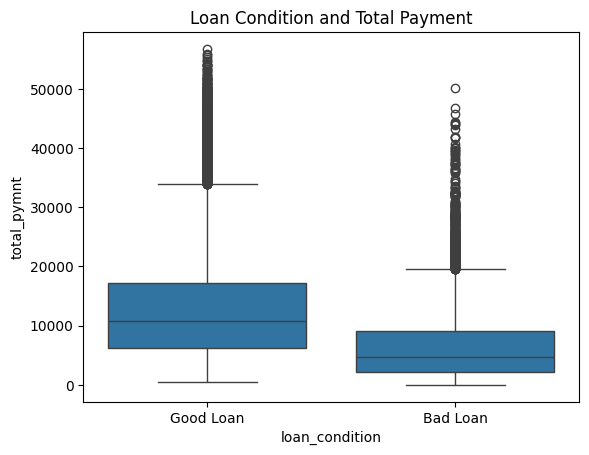

In [12]:
sns.boxplot(data=data,x='loan_condition',y='total_pymnt',showfliers=True)
plt.title("Loan Condition and Total Payment")
plt.show()

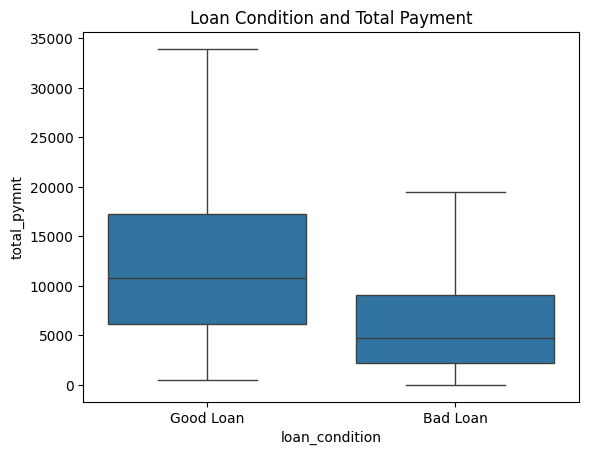

In [13]:
sns.boxplot(data=data,x='loan_condition',y='total_pymnt',showfliers=False)
plt.title("Loan Condition and Total Payment")
plt.show()

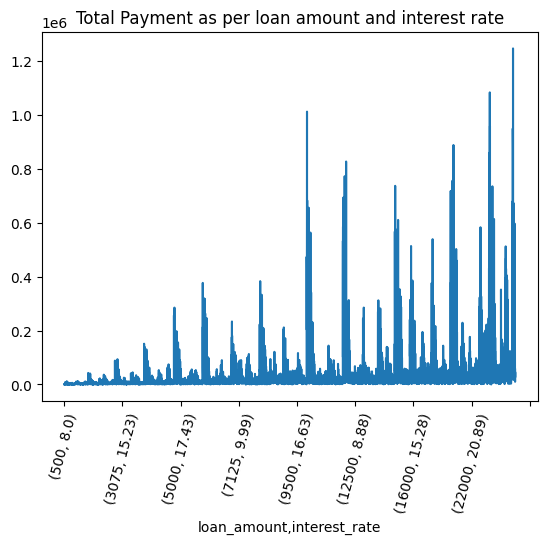

In [18]:
data.groupby(['loan_amount', 'interest_rate'])['total_pymnt'].sum().plot()
plt.title("Total Payment as per loan amount and interest rate")
plt.xticks(rotation=75)
plt.show()

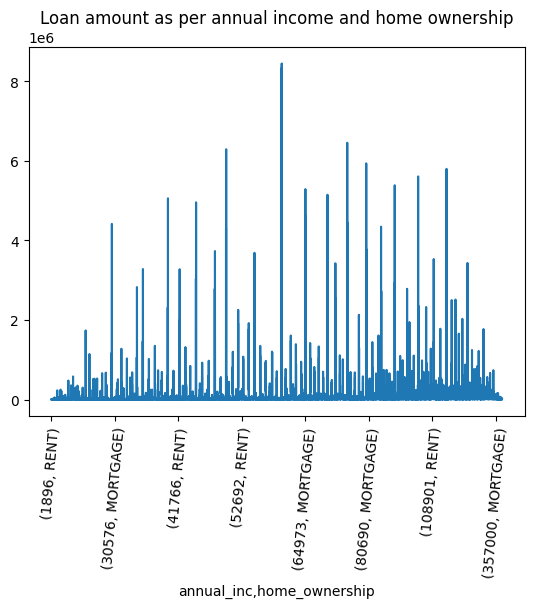

In [19]:
data.groupby(['annual_inc', 'home_ownership'])['loan_amount'].sum().plot()
plt.title("Loan amount as per annual income and home ownership")
plt.xticks(rotation=85)
plt.show()

Scatter Plot

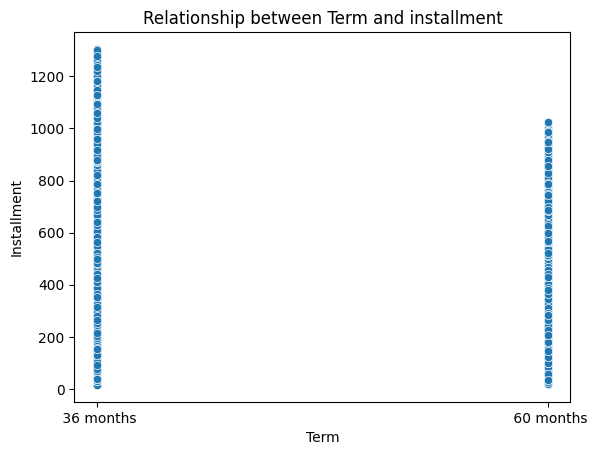

In [27]:
sns.scatterplot(data=data, x='term', y='installment')
plt.title('Relationship between Term and installment')
plt.xlabel('Term')
plt.ylabel('Installment')
plt.show()

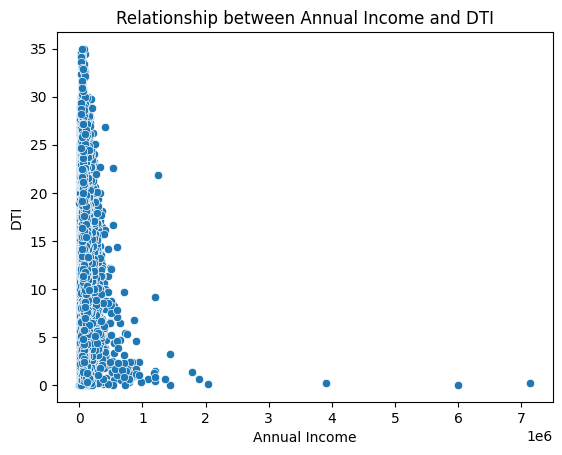

In [36]:
sns.scatterplot(x='annual_inc', y='dti', data=data)
plt.title('Relationship between Annual Income and DTI')
plt.xlabel('Annual Income')
plt.ylabel('DTI')
plt.show()

Line Chart

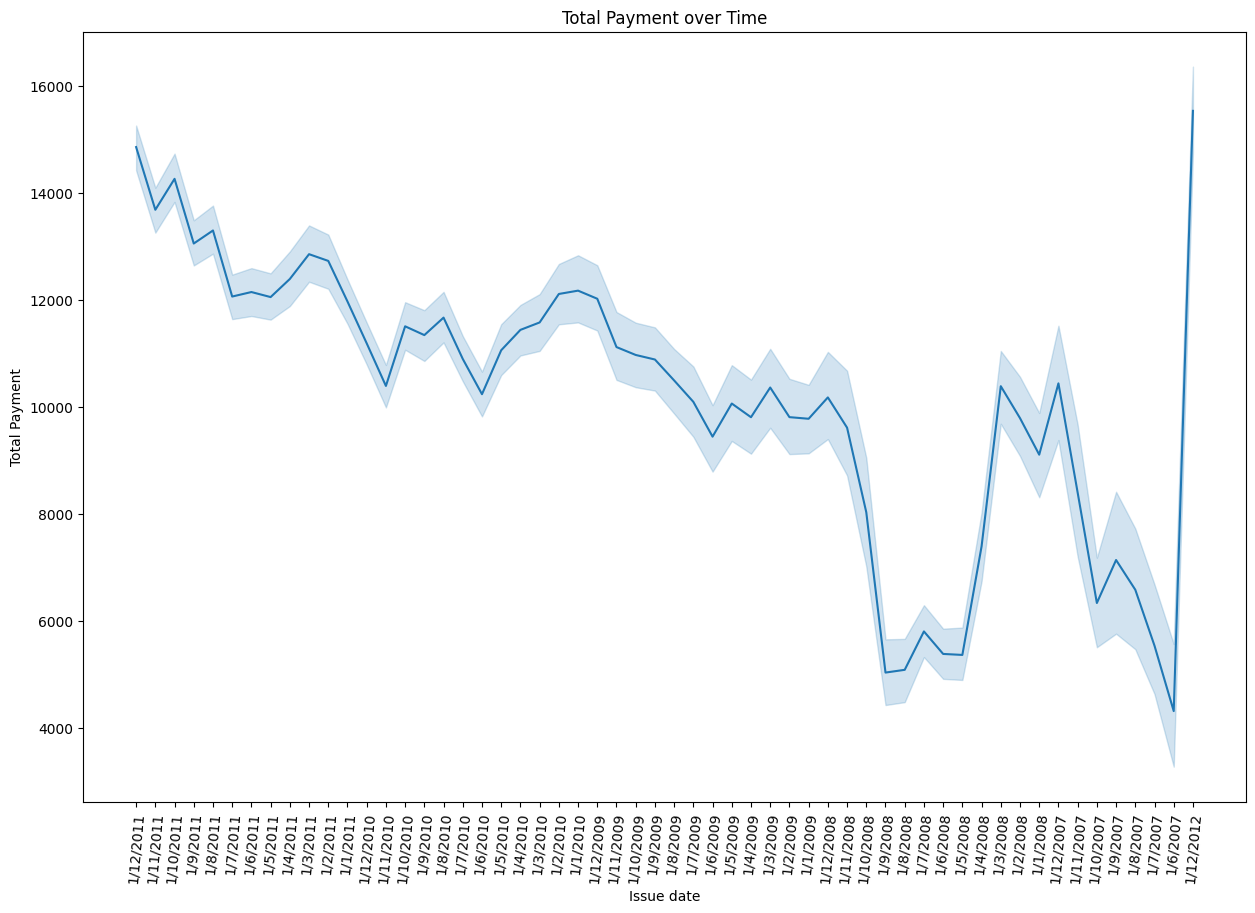

In [34]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data, x='issue_d', y='total_pymnt')
plt.title('Total Payment over Time')
plt.xlabel('Issue date')
plt.ylabel('Total Payment')
plt.xticks(rotation=85)
plt.show()

3D chart

In [53]:
import plotly.express as px

fig = px.scatter_3d(data, x='loan_amount', y='total_pymnt', z='total_rec_prncp',
                  color='loan_condition')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Loan Amount'),
                    yaxis = dict(title  = 'Total Amount'),
                    zaxis = dict(title  = 'Total rec Principle')))
fig.show()